In [2]:
import numpy as np
import tensorflow as tf


def setup_datasets(self):
        # tf.enable_eager_execution()

        # generate indices for each dataset
        # also write cluster info

        CIFAR10_TRAINSET_DATA_SIZE = 50000
        CIFAR10_TESTSET_DATA_SIZE = 10000

        cfg = self.config

        self.dataset = {}

        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            self._setup_dataset(CIFAR10_TRAINSET_DATA_SIZE, cfg['p'], cfg['m'], cfg['n'])
        dl = self._load_CIFAR(train=True)
        dataset['data_loader'] = dl
        self.dataset['train'] = dataset

        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            self._setup_dataset(CIFAR10_TESTSET_DATA_SIZE, cfg['p'], cfg['m_test'], cfg['n'], random=False)
        dl = self._load_CIFAR(train=False)
        dataset['data_loader'] = dl
        self.dataset['test'] = dataset

        # tf.disable_eager_execution()

        # import ipdb; ipdb.set_trace()


def _setup_dataset(num_data, p, m, n, random = True):

        assert (m // p) * n == num_data

        dataset = {}

        data_indices = []
        cluster_assign = []

        m_per_cluster = m // p

        for p_i in range(p):

            if random:
                ll = list(np.random.permutation(num_data))
            else:
                ll = list(range(num_data))

            ll2 = chunkify(ll, m_per_cluster) # splits ll into m lists with size n
            data_indices += ll2

            cluster_assign += [p_i for _ in range(m_per_cluster)]

        data_indices = np.array(data_indices)
        cluster_assign = np.array(cluster_assign)
        assert data_indices.shape[0] == cluster_assign.shape[0]
        assert data_indices.shape[0] == m

        # import ipdb; ipdb.set_trace()

        return data_indices, cluster_assign


def load_CIFAR(train=True):
        # gives dataloader that gives (X,y) based on asked index

        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        # (50000, 32,32, 3) [0~1] , (50000, 1)

        if train:
            X = x_train / 255.0
            y = y_train.reshape(-1)
        else:
            X = x_test / 255.0
            y = y_test.reshape(-1)

        return X, y


def chunk(a, i, n):
    a2 = chunkify(a, n)
    return a2[i]

def chunkify(a, n):
    # splits list into even size list of lists
    # [1,2,3,4] -> [1,2], [3,4]

    k, m = divmod(len(a), n)
    gen = (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))
    return list(gen)

In [3]:
x,y = load_CIFAR()

In [4]:
x.shape

(50000, 32, 32, 3)

In [5]:
import argparse
import json

def get_config():
    arg_seed = 0

    # parser = argparse.ArgumentParser()
    # parser.add_argument("--project-dir",type=str,default="output")
    # parser.add_argument("--dataset-dir",type=str,default="output")
    # # parser.add_argument("--num-epochs",type=float,default=)
    # # parser.add_argument("--lr",type=float,default=0.2)
    # parser.add_argument("--data-seed",type=int,default=0)
    # parser.add_argument("--train-seed",type=int,default=arg_seed)
    # parser.add_argument("--config-override",type=str,default="")
    # args = parser.parse_args()

    args = {}
    args['project_dir'] = "output"
    args['dataset_dir'] = "output"
    args['data_seed'] = 0
    args['train_seed'] = arg_seed
    args['config_override'] = ""

    # read config json and update the sysarg
    with open("config.json", "r") as read_file:
        config = json.load(read_file)

    #args_dict = vars(args)
    config.update(args)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

In [6]:
config = get_config()

CIFAR10_TRAINSET_DATA_SIZE = 50000
CIFAR10_TESTSET_DATA_SIZE = 10000

In [7]:
config

{'m': 200,
 'm_test': 40,
 'p': 2,
 'n': 500,
 'participation_rate': 0.1,
 'num_epochs': 600,
 'batch_size': 50,
 'tau': 5,
 'lr': 0.25,
 'data_seed': 0,
 'train_seed': 0,
 'project_dir': 'output',
 'dataset_dir': 'output'}

In [8]:
        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            _setup_dataset(CIFAR10_TRAINSET_DATA_SIZE, config['p'], config['m'], config['n'])

In [9]:
dataset['data_indices'].shape

(200, 500)

In [10]:
dataset['data_indices'][0]

array([ 4531, 16706, 27330, 45634,  3969, 23281,   925, 13811, 24489,
       21235, 40628, 47354, 25310, 34723, 15920, 16664, 46934, 12044,
         479, 31794, 43418, 10162, 32400,  9410, 10657, 46177, 44512,
       49798, 16810, 38988, 20447,  5563, 18463,  9631, 31905, 28649,
       17721, 36098, 17131, 42712, 11474, 46045, 11839, 22687, 32219,
       14864, 45612, 13822,   707, 28901, 23144, 38082, 12471,  2641,
       27579,  5651, 33262, 30004, 23568, 35909,  5656, 47076, 25525,
       31644, 23992, 46038, 36681, 26721, 37063, 18355, 24793,  4288,
       47194, 18267, 21883, 36840, 41256, 25606, 37857, 37807, 20012,
       34750, 13066, 11748, 31937, 43239, 38127, 19901,  1735, 48098,
       30745, 37159,   970, 16389,  2793, 42037,  6886,  5774, 29366,
       40854, 19785, 49763, 45042,  5856, 36976, 10138, 32313, 32968,
        5989, 46660, 21649, 27723, 32513, 17219, 41421,  7540, 39779,
        3847, 40242, 47809, 10809,  5042, 36472, 26282, 28817,   558,
       48781,  5708,

In [11]:
len(dataset['cluster_assign'])

200

In [12]:
np.unique(dataset['cluster_assign'])

array([0, 1])

In [13]:
dl = load_CIFAR(train=True)
dataset['data_loader'] = dl
dataset['train'] = dataset

In [14]:
dataset

{'data_indices': array([[ 4531, 16706, 27330, ..., 48937, 15015, 41175],
        [35258, 41521, 11652, ..., 46226,  7814, 17660],
        [47526, 48773,  6957, ..., 27321,  8132, 20080],
        ...,
        [43729, 33505, 18858, ..., 30152, 30086, 15568],
        [25025, 15652,  8449, ..., 49920, 44358,  6505],
        [30240, 49466, 39136, ..., 47356, 37741, 37371]]),
 'cluster_assign': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 

In [15]:
dataset['cluster_assign']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [16]:
dataset['data_indices'][0].shape

(500,)

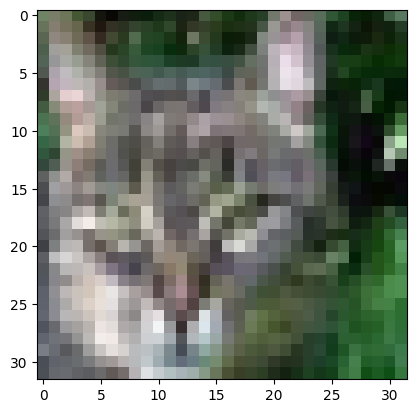

In [23]:
# show image in color
import matplotlib.pyplot as plt

img = dataset['data_loader'][0][dataset['data_indices'][0]][3]

plt.imshow(img)

In [33]:
(5 // 2) * 500 

1000

In [32]:
(200 // 2) * 500 

50000

In [3]:
import non_iiddata_generator_no_drifting as utils

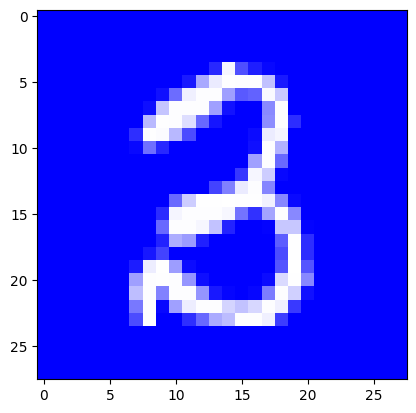

In [5]:

# Load the dataset
dataset_name = "MNIST"  # You can change this to "FMNIST", "CIFAR10", "CIFAR100", etc.
train_images, train_labels, test_images, test_labels = utils.load_full_datasets(dataset_name)

# Define parameters for split_feature_skew
client_number = 10
set_rotation = True
rotations = 4
scaling_rotation_low = 0.1
scaling_rotation_high = 0.2
set_color = True
colors = 3
scaling_color_low = 0.1
scaling_color_high = 0.2
random_order = True

# Run split_feature_skew
clients_data = utils.split_feature_skew(
    train_features = train_images,
    train_labels = train_labels,
    test_features = test_images,
    test_labels = test_labels,
    client_number = client_number,
    set_rotation = set_rotation,
    rotations = rotations,
    scaling_rotation_low = scaling_rotation_low,
    scaling_rotation_high = scaling_rotation_high,
    set_color = set_color,
    colors = colors,
    scaling_color_low = scaling_color_low,
    scaling_color_high = scaling_color_high,
    random_order = random_order
)


import matplotlib.pyplot as plt
# Example: Visualize the first image from the first client
plt.imshow(clients_data[0]['train_features'][0].permute(1, 2, 0))
plt.show()

In [29]:
clients_data[0]['train_features'].shape

torch.Size([6000, 3, 28, 28])

In [11]:
clients_data[0]['train_labels'].numpy()

array([3, 6, 0, ..., 4, 4, 2])

In [9]:
clients_data[0]['train_labels'].shape

torch.Size([6000])

In [7]:
len(clients_data)

10

In [8]:
clients_data[0].keys()

dict_keys(['train_features', 'train_labels', 'test_features', 'test_labels'])

In [10]:
for i in range(0, 100, 10):
    print(i)

0
10
20
30
40
50
60
70
80
90


In [15]:
# setup tensorflow model structure
import argparse
import json
import os
import time
import itertools
import pickle
import copy

import tensorflow as tf

import numpy as np

from util import *
import cifar10 



class TrainCIFARCluster(object):
    def __init__(self, config):
        self.config = config

        assert self.config['m'] % self.config['p'] == 0

    def set_random_seed(seed):
        np.random.seed(seed)
        tf.set_random_seed(seed)

    def setup(self):

        os.makedirs(self.config['project_dir'], exist_ok = True)

        self.result_fname = os.path.join(self.config['project_dir'], 'results')
        self.checkpoint_fname = os.path.join(self.config['project_dir'], 'checkpoint')

        set_random_seed(self.config['data_seed'])
        self.setup_datasets()
        self.setup_model()

        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        self.sess = tf.Session(config=config)


        set_random_seed(self.config['data_seed']+self.config['train_seed'])
        self.initialize_models()
        self.initialize_assign_ops()

        # import ipdb; ipdb.set_trace()

        self.epoch = None
        self.lr = None


    def setup_datasets(self):
        # tf.enable_eager_execution()

        # generate indices for each dataset
        # also write cluster info

        # CIFAR10_TRAINSET_DATA_SIZE = 50000  #!!
        # CIFAR10_TESTSET_DATA_SIZE = 10000
        CIFAR10_TRAINSET_DATA_SIZE = 2500  #!!
        CIFAR10_TESTSET_DATA_SIZE = 2500

        cfg = self.config

        self.dataset = {}
        self.our_dataset = our_data_creation()

        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            self._setup_dataset(CIFAR10_TRAINSET_DATA_SIZE, cfg['p'], cfg['m'], cfg['n'])
        dl = self._load_CIFAR(train=True)
        dataset['data_loader'] = dl
        self.dataset['train'] = dataset

        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            self._setup_dataset(CIFAR10_TESTSET_DATA_SIZE, cfg['p'], cfg['m_test'], cfg['n'], random=False)
        dl = self._load_CIFAR(train=False)
        dataset['data_loader'] = dl
        self.dataset['test'] = dataset

        # tf.disable_eager_execution()

        # import ipdb; ipdb.set_trace()


    def _setup_dataset(self, num_data, p, m, n, random = True):

        assert (m // p) * n == num_data

        dataset = {}

        cfg = self.config

        data_indices = []
        cluster_assign = []

        m_per_cluster = m // p

        for p_i in range(p):

            if random:
                ll = list(np.random.permutation(num_data))
            else:
                ll = list(range(num_data))

            ll2 = chunkify(ll, m_per_cluster) # splits ll into m lists with size n
            data_indices += ll2

            cluster_assign += [p_i for _ in range(m_per_cluster)]

        data_indices = np.array(data_indices)
        cluster_assign = np.array(cluster_assign)
        assert data_indices.shape[0] == cluster_assign.shape[0]
        print(data_indices.shape)
        print(m)
        assert data_indices.shape[0] == m

        # import ipdb; ipdb.set_trace()

        return data_indices, cluster_assign


    def _load_CIFAR(self, train=True):
        # gives dataloader that gives (X,y) based on asked index

        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        # (50000, 32,32, 3) [0~1] , (50000, 1)

        if train:
            X = x_train / 255.0
            y = y_train.reshape(-1)
        else:
            X = x_test / 255.0
            y = y_test.reshape(-1)

        return X, y


    def setup_model(self):

        # setup tensorflow model structure

        # self.x_pl = tf.placeholder(tf.float32, shape=(None, 24, 24, 3), name='input_x')
        self.x_pl = tf.placeholder(tf.float32, shape=(None, 28, 28, 3), name='input_x')   # !!!
        self.y_pl = tf.placeholder(tf.int32, shape=(None, ), name='output_y')
        self.lr_pl = tf.placeholder(tf.float32, shape=(), name='learning_rate')

        self.y_logits = cifar10.inference(self.x_pl) # construct model
        self.loss = cifar10.loss(self.y_logits, self.y_pl)

        self.y_pred = tf.cast(tf.argmax(self.y_logits, 1), tf.int32)
        self.correct_prediction = tf.equal(self.y_pred, self.y_pl) # used for accuracy
        self.num_correct = tf.reduce_sum(tf.cast(self.correct_prediction, tf.int64))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

        self.optimizer = tf.train.GradientDescentOptimizer(self.lr_pl)
        self.train_op = self.optimizer.minimize(self.loss)
        self.opt_reset_op = tf.variables_initializer(self.optimizer.variables())

        # import ipdb; ipdb.set_trace() # check self.optimizer.variables()

        self.metrics = { # used by self.eval()
            'loss':self.loss,
            'correct': self.num_correct,
            # and add more...
        }


        # transform ops
        self.x_tr_pl = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))           # !!!!!!
        # self.x_tr_pl = tf.placeholder(tf.float32, shape=(None, 28, 28, 3))
        # with tf.device('/cpu:0'):
        self.train_transform_op = train_transform(self.x_tr_pl) 
        self.test_transform_op = test_transform(self.x_tr_pl) 


    def initialize_models(self):

        p = self.config['p']

        # initialize p times, to get p different sets of weights.

        self.init_op = tf.global_variables_initializer()

        self.model_weights = []
        for p_i in range(p):
            self.sess.run(self.init_op)
            weights = self.get_model_weights()
            self.model_weights.append(weights)


    IMAGE_SIZE = 28 # !!! was 24

    def train_transform(reshaped_image):
        # copied from cifar10_input.py / distorted_input()

        height = IMAGE_SIZE
        width = IMAGE_SIZE

        # Image processing for training the network. Note the many random
        # distortions applied to the image.

        # Randomly crop a [height, width] section of the image.
        distorted_image = tf.random_crop(reshaped_image, [tf.shape(reshaped_image)[0], height, width, 3])
        # tf shape gives dynamic shape

        # Randomly flip the image horizontally.
        distorted_image = tf.image.random_flip_left_right(distorted_image)

        # Because these operations are not commutative, consider randomizing
        # the order their operation.
        distorted_image = tf.image.random_brightness(distorted_image,
                                                max_delta=63)
        distorted_image = tf.image.random_contrast(distorted_image,
                                                lower=0.2, upper=1.8)

        # Subtract off the mean and divide by the variance of the pixels.
        float_image = tf.image.per_image_standardization(distorted_image)

        return float_image


def get_config():
    arg_seed = 0

    parser = argparse.ArgumentParser()
    parser.add_argument("--project-dir",type=str,default="output")
    parser.add_argument("--dataset-dir",type=str,default="output")
    # parser.add_argument("--num-epochs",type=float,default=)
    # parser.add_argument("--lr",type=float,default=0.2)
    parser.add_argument("--data-seed",type=int,default=0)
    parser.add_argument("--train-seed",type=int,default=arg_seed)
    parser.add_argument("--config-override",type=str,default="")
    args = parser.parse_args()

    # read config json and update the sysarg
    with open("config.json", "r") as read_file:
        config = json.load(read_file)

    args_dict = vars(args)
    config.update(args_dict)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

In [31]:
    config = {
        "m" : 10,  
        "m_test" : 10,
        "p" : 2,
        "n" : 500,

        "participation_rate":1,

        "num_epochs": 600,

        "batch_size":50,
        "tau":5,
        "lr":0.25,

        "data_seed":0,
        "train_seed":0,

        "data_seed":0, # seed for data generation
        "train_seed":0 # seed for training
    }
    config['train_seed'] = config['data_seed']
    print("config:",config)

    exp = TrainCIFARCluster(config)

config: {'m': 10, 'm_test': 10, 'p': 2, 'n': 500, 'participation_rate': 1, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 0, 'train_seed': 0}


In [20]:
    exp.setup()

KeyError: 'project_dir'

In [19]:
model = exp.setup_model()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor










NameError: name 'train_transform' is not defined

In [21]:

def get_config():
    arg_seed = 0

    parser = argparse.ArgumentParser()
    parser.add_argument("--project-dir",type=str,default="output")
    parser.add_argument("--dataset-dir",type=str,default="output")
    # parser.add_argument("--num-epochs",type=float,default=)
    # parser.add_argument("--lr",type=float,default=0.2)
    parser.add_argument("--data-seed",type=int,default=0)
    parser.add_argument("--train-seed",type=int,default=arg_seed)
    parser.add_argument("--config-override",type=str,default="")
    args = parser.parse_args()

    # read config json and update the sysarg
    with open("config.json", "r") as read_file:
        config = json.load(read_file)

    args_dict = vars(args)
    config.update(args_dict)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config


class TrainCIFARCluster(object):
    def __init__(self, config):
        self.config = config

        assert self.config['m'] % self.config['p'] == 0

    def setup(self):

        os.makedirs(self.config['project_dir'], exist_ok = True)

        self.result_fname = os.path.join(self.config['project_dir'], 'results')
        self.checkpoint_fname = os.path.join(self.config['project_dir'], 'checkpoint')

        set_random_seed(self.config['data_seed'])
        self.setup_datasets()
        self.setup_model()

        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        self.sess = tf.Session(config=config)


        set_random_seed(self.config['data_seed']+self.config['train_seed'])
        self.initialize_models()
        self.initialize_assign_ops()

        # import ipdb; ipdb.set_trace()

        self.epoch = None
        self.lr = None


    def setup_datasets(self):
        # tf.enable_eager_execution()

        # generate indices for each dataset
        # also write cluster info

        # CIFAR10_TRAINSET_DATA_SIZE = 50000  #!!
        # CIFAR10_TESTSET_DATA_SIZE = 10000
        CIFAR10_TRAINSET_DATA_SIZE = 2500  #!!
        CIFAR10_TESTSET_DATA_SIZE = 2500

        cfg = self.config

        self.dataset = {}
        self.our_dataset = our_data_creation()

        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            self._setup_dataset(CIFAR10_TRAINSET_DATA_SIZE, cfg['p'], cfg['m'], cfg['n'])
        dl = self._load_CIFAR(train=True)
        dataset['data_loader'] = dl
        self.dataset['train'] = dataset

        dataset = {}
        dataset['data_indices'], dataset['cluster_assign'] = \
            self._setup_dataset(CIFAR10_TESTSET_DATA_SIZE, cfg['p'], cfg['m_test'], cfg['n'], random=False)
        dl = self._load_CIFAR(train=False)
        dataset['data_loader'] = dl
        self.dataset['test'] = dataset

        # tf.disable_eager_execution()

        # import ipdb; ipdb.set_trace()


    def _setup_dataset(self, num_data, p, m, n, random = True):

        assert (m // p) * n == num_data

        dataset = {}

        cfg = self.config

        data_indices = []
        cluster_assign = []

        m_per_cluster = m // p

        for p_i in range(p):

            if random:
                ll = list(np.random.permutation(num_data))
            else:
                ll = list(range(num_data))

            ll2 = chunkify(ll, m_per_cluster) # splits ll into m lists with size n
            data_indices += ll2

            cluster_assign += [p_i for _ in range(m_per_cluster)]

        data_indices = np.array(data_indices)
        cluster_assign = np.array(cluster_assign)
        assert data_indices.shape[0] == cluster_assign.shape[0]
        print(data_indices.shape)
        print(m)
        assert data_indices.shape[0] == m

        # import ipdb; ipdb.set_trace()

        return data_indices, cluster_assign


    def _load_CIFAR(self, train=True):
        # gives dataloader that gives (X,y) based on asked index

        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        # (50000, 32,32, 3) [0~1] , (50000, 1)

        if train:
            X = x_train / 255.0
            y = y_train.reshape(-1)
        else:
            X = x_test / 255.0
            y = y_test.reshape(-1)

        return X, y


    def setup_model(self):

        # setup tensorflow model structure

        # self.x_pl = tf.placeholder(tf.float32, shape=(None, 24, 24, 3), name='input_x')
        self.x_pl = tf.placeholder(tf.float32, shape=(None, 28, 28, 3), name='input_x')   # !!!
        self.y_pl = tf.placeholder(tf.int32, shape=(None, ), name='output_y')
        self.lr_pl = tf.placeholder(tf.float32, shape=(), name='learning_rate')

        self.y_logits = cifar10.inference(self.x_pl) # construct model
        self.loss = cifar10.loss(self.y_logits, self.y_pl)

        self.y_pred = tf.cast(tf.argmax(self.y_logits, 1), tf.int32)
        self.correct_prediction = tf.equal(self.y_pred, self.y_pl) # used for accuracy
        self.num_correct = tf.reduce_sum(tf.cast(self.correct_prediction, tf.int64))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

        self.optimizer = tf.train.GradientDescentOptimizer(self.lr_pl)
        self.train_op = self.optimizer.minimize(self.loss)
        self.opt_reset_op = tf.variables_initializer(self.optimizer.variables())

        # import ipdb; ipdb.set_trace() # check self.optimizer.variables()

        self.metrics = { # used by self.eval()
            'loss':self.loss,
            'correct': self.num_correct,
            # and add more...
        }


        # transform ops
        self.x_tr_pl = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))           # !!!!!!
        # self.x_tr_pl = tf.placeholder(tf.float32, shape=(None, 28, 28, 3))
        # with tf.device('/cpu:0'):
        self.train_transform_op = train_transform(self.x_tr_pl) 
        self.test_transform_op = test_transform(self.x_tr_pl) 


    def initialize_models(self):

        p = self.config['p']

        # initialize p times, to get p different sets of weights.

        self.init_op = tf.global_variables_initializer()

        self.model_weights = []
        for p_i in range(p):
            self.sess.run(self.init_op)
            weights = self.get_model_weights()
            self.model_weights.append(weights)

    def get_model_weights(self):
        self.collection = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

        names = [var.name for var in self.collection]
        weights_arrays = self.sess.run(self.collection)

        weights = dict(zip(names, weights_arrays))
        # {'conv1/weights:0': np.array, ...}

        # import ipdb; ipdb.set_trace()

        return weights

    def initialize_assign_ops(self):
        self.collection = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

        assign_ops = {}
        assign_pls = {}
        for var in self.collection:
            # import ipdb; ipdb.set_trace()
            pl = tf.placeholder(tf.float32, shape=var.shape)
            assign_pls[var.name] = pl

            op = tf.compat.v1.assign(var, pl)
            assign_ops[var.name] = op


        self.assign_ops = assign_ops
        self.assign_pls = assign_pls

    def put_model_weights(self, weights):

        assign_ops = []

        fd = {}
        for var_name in self.assign_pls:
            # assign_op = tf.assign(var, weights[var.name])
            pl = self.assign_pls[var_name]
            fd[pl] = weights[var_name]

        self.sess.run(self.opt_reset_op) # reset the optimizer state ?
        self.sess.run(list(self.assign_ops.values()), feed_dict = fd)

    def average_model_weights(self, weights_list):

        w2 = {}

        for key in weights_list[0].keys():

            w2[key] = np.mean([w[key] for w in weights_list], axis=0)

        return w2


    def run(self):
        TRAIN_INFER_FULL_NODES = 0

        num_epochs = self.config['num_epochs']
        lr = self.config['lr']

        results = []

        # epoch -1
        self.epoch = -1

        print("initial test0")

        # self.find_good_initializer()   #!!!

        result = {}
        result['epoch'] = -1

        t0 = time.time()
        print("initial test1")
        self.set_participating_nodes()
        print("initial test1.1")
        res = self.test(train=True, force_full_nodes =TRAIN_INFER_FULL_NODES)
        print("initial test1.2")
        # res = self.test(train=True)
        t1 = time.time()
        res['infer_time'] = t1-t0
        result['train'] = res

        self.print_epoch_stats(res)

        print("initial test2")


        t0 = time.time()
        res = self.test(train=False)
    
        print("initial test3")

        t1 = time.time()
        res['infer_time'] = t1-t0
        result['test'] = res
        self.print_epoch_stats(res)
        results.append(result)

        # this will be used in next epoch

        for epoch in range(num_epochs):
            self.epoch = epoch

            result = {}
            result['epoch'] = epoch

            lr = self.lr_schedule(epoch)
            result['lr'] = lr

            t0 = time.time()
            print("initial test4")

            result['train'] = self.train(lr = lr)
            t1 = time.time()
            train_time = t1-t0

            t0 = time.time()
            self.set_participating_nodes()
            # res = self.test(train=True)
            print("initial test5")

            res = self.test(train=True, force_full_nodes =TRAIN_INFER_FULL_NODES)
            t1 = time.time()
            res['infer_time'] = t1-t0
            res['train_time'] = train_time
            res['lr'] = lr
            result['train'] = res

            self.print_epoch_stats(res)

            t0 = time.time()
            res = self.test(train=False)
            t1 = time.time()
            res['infer_time'] = t1-t0
            result['test'] = res
            self.print_epoch_stats(res)

            results.append(result)

            if epoch % 10 == 0 or epoch == num_epochs - 1 :
                with open(self.result_fname+".pickle", 'wb') as outfile:
                    pickle.dump(results, outfile)
                    print(f'result written at {self.result_fname+".pickle"}')
                # self.save_checkpoint()
                # print(f'checkpoint written at {self.checkpoint_fname}')

        # import ipdb; ipdb.set_trace()


    def find_good_initializer(self):
        print("finding good initializer from train data")

        cfg = self.config

        if cfg['p'] == 4:
            th = 0.1
        elif cfg['p'] == 2:
            th = 0.35
        elif cfg['p'] == 1:
            th = 0.0
        else:
            raise NotImplementedError("only p=1,2,4 supported")

        is_not_good = True
        while is_not_good:
            self.initialize_models()
            t0 = time.time()
            self.set_participating_nodes()
            # res = self.test(train=True, force_full_nodes = True)
            res = self.test(train=True)
            t1 = time.time()
            res['infer_time'] = t1-t0
            self.print_epoch_stats(res)

            cl_ct = res['cl_ct']

            num_nodes = np.sum(cl_ct)
            is_not_good = False
            for ct in cl_ct:
                if ct / num_nodes < th:
                    is_not_good = True

        print("found good initializer")



    def set_participating_nodes(self):
        cfg = self.config
        m = cfg['m']
        p = cfg['p']
        p_rate = cfg['participation_rate']

        self.participating_nodes = np.random.choice(m, int(m * p_rate), replace = False)

        return self.participating_nodes

    def lr_schedule(self, epoch):
        if self.lr is None:
            self.lr = self.config['lr']

        if epoch != 0 and LR_DECAY:
            self.lr = self.lr * 0.99

        return self.lr


    def print_epoch_stats(self, res):
        if res['is_train']:
            data_str = 'tr'
        else:
            data_str = 'tst'

        if 'train_time' in res:
            time_str = f"{res['train_time']:.3f}sec(train) {res['infer_time']:.3f}sec(infer)"
        else:
            time_str = f"{res['infer_time']:.3f}sec"

        if 'lr' in res:
            lr_str = f" lr {res['lr']:4f}"
        else:
            lr_str = ""

        if 'cl_ct' in res:
            cl_str = f" clct{res['cl_ct']} ans{res['cl_ct_ans']}"
        else:
            cl_str = ""

        str0 = f"Epoch {self.epoch} {data_str}: l {res['loss']:.3f} a {res['acc']:.3f} {cl_str}{lr_str} {time_str}"

        print(str0)

    def train(self, lr):

        VERBOSE = 0

        cfg = self.config
        m = cfg['m']
        p = cfg['p']
        tau = cfg['tau']
        n = cfg['n']
        batch_size = cfg['batch_size']

        participating_nodes = self.participating_nodes
        cluster_assign = self.cluster_assign

        t_put_weight = 0
        t_get_weight = 0
        time_load_data = 0
        time_train = 0


        t0 = time.time()

        updated_local_weights = []
        for m_i2, m_i in enumerate(participating_nodes):
            print(f'Local update m_i2 {m_i2}/{len(participating_nodes)} processing')
            print(f'Machine {m_i} is processing')
            p_i = cluster_assign[m_i]

            # if VERBOSE and m_i2 % 1 == 0: print(f'Local update m_i2 {m_i2}/{len(participating_nodes)} processing \r', end ='')
            if VERBOSE and m_i2 % 1 == 0: print(f'Local update m_i2 {m_i2}/{len(participating_nodes)} processing')

            # Local Update process

            t_p = time.time()
            self.put_model_weights(self.model_weights[p_i])
            t_p1 = time.time()
            t_put_weight += t_p1-t_p

            for l_epoch in range(tau): # local epochs

                pmt = np.random.permutation(n)
                local_indices_list = create_batches(pmt, batch_size = batch_size)
                node_data_indices = self.dataset['train']['data_indices'][m_i]

                X_train = self.our_dataset[m_i2]['train_features']
                y_train = self.our_dataset[m_i2]['train_labels']
                # random shuffle
                pmt2 = np.random.permutation(len(X_train))
                X_train = X_train[pmt2]
                y_train = y_train[pmt2]
                # permute data from [6000, 3, 28, 28] to [6000, 28, 28, 3] 
                X_train = np.transpose(X_train, (0, 2, 3, 1))
                # numpy 
                X_train = X_train.numpy()
                y_train = y_train.numpy()
                
                # cycle across batches (use batch_size) - our implementation 
                for ii in range(0, len(X_train), batch_size):
                    t00 = time.time()
                    X_b = X_train[ii:ii+batch_size]
                    y_b = y_train[ii:ii+batch_size]

                    print(f'X_b shape: {X_b.shape}') #X_b shape: (50, 24, 24, 3)
                    print(f'X_b type: {type(X_b)}') #X_b type: <class 'numpy.ndarray'>
                    print(f'y_b shape: {y_b.shape}') #y_b shape: (50,)
                    t01 = time.time()

                    fd0 = {
                        self.x_pl:X_b,
                        self.y_pl:y_b,
                        self.lr_pl:self.lr
                    }
                    self.sess.run([self.train_op], feed_dict= fd0)

                    t02 = time.time()

                    time_load_data += t01 - t00
                    time_train += t02 - t01

                # original implementation
                # for b_i, local_indices in enumerate(local_indices_list):
                #     t00 = time.time()

                #     current_batch_indices = node_data_indices[local_indices]

                #     (X_b, y_b) = self.load_data_by_index(current_batch_indices, m_i)     ####### !!!! Modify here to load our data for client m_i (partecipating). Inside this function they rotate the images with respect to dataset['cluster_assign']. So we can substitute this part directly with our dataset for each client
                    
                #     print(f'X_b shape: {X_b.shape}') #X_b shape: (50, 24, 24, 3)
                #     print(f'X_b type: {type(X_b)}') #X_b type: <class 'numpy.ndarray'>
                #     print(f'y_b shape: {y_b.shape}') #y_b shape: (50,)
                #     t01 = time.time()

                #     fd0 = {
                #         self.x_pl:X_b,
                #         self.y_pl:y_b,
                #         self.lr_pl:self.lr
                #     }
                #     self.sess.run([self.train_op], feed_dict= fd0)

                #     t02 = time.time()

                #     time_load_data += t01 - t00
                #     time_train += t02 - t01
                


            t_p = time.time()
            updated_local_weight = self.get_model_weights()
            t_p1 = time.time()
            t_get_weight += t_p1-t_p

            updated_local_weights.append(updated_local_weight)

        t1 = time.time()

        # averaging


        local_weights_cluster = [[] for _ in range(p)]

        for m_i2, m_i in enumerate(participating_nodes):
            p_i = cluster_assign[m_i]
            local_weights_cluster[p_i].append(updated_local_weights[m_i2])

        for p_i in range(p):
            if len(local_weights_cluster[p_i]) > 0:
                self.model_weights[p_i] = self.average_model_weights(local_weights_cluster[p_i])

        t2 = time.time()

        if VERBOSE: print(f"train_whole {t1-t0:.3f} t_gd {time_train:.3f} t load data {time_load_data:.3f} t put model {t_put_weight:.3f} t get mdoel {t_get_weight:.3f}  averaging {t2-t1:.3f}")

    def test(self, train = True, force_full_nodes = False):

        VERBOSE = 0

        cfg = self.config
        p = cfg['p']
        p_rate = cfg['participation_rate']


        if train:
            m = cfg['m']
            dataset = self.dataset['train']
            if force_full_nodes:
                participating_nodes = list(range(m))
            else:
                participating_nodes = self.participating_nodes
        else:
            m = cfg['m_test']
            dataset = self.dataset['test']
            participating_nodes = list(range(m))

            # DEBUGGING
            # print("DEBUGGING MODEe")
            # participating_nodes = np.random.choice(m, int(m * p_rate), replace = False)


        # get loss and correct from all data
        t_load_model = 0
        t_load_data = 0
        t_infer = 0

        losses = {}
        corrects = {}
        for p_i in range(p):

            tp0= time.time()
            self.put_model_weights(self.model_weights[p_i])
            tp1= time.time()
            t_load_model += tp1-tp0

            for m_i in participating_nodes:

                t00= time.time()
                # (X, y) = self.load_node_data(m_i, train=train) # load batch data rotated    #!!!

                X_train = self.our_dataset[m_i]['train_features']
                y_train = self.our_dataset[m_i]['train_labels']
                # random shuffle
                pmt2 = np.random.permutation(len(X_train))
                X_train = X_train[pmt2]
                y_train = y_train[pmt2]
                # permute data from [6000, 3, 28, 28] to [6000, 28, 28, 3] 
                X_train = np.transpose(X_train, (0, 2, 3, 1))
                # numpy 
                X = X_train.numpy()
                y = y_train.numpy()
                X = X[:500]
                y = y[:500]

                print(f'X shape: {X.shape}') #X shape: (500, 24, 24, 3)
                t01= time.time()
                t_load_data += t01-t00

                ti0= time.time()
                (loss, correct) = self.sess.run([self.loss, self.num_correct], feed_dict = {self.x_pl:X, self.y_pl:y})
                ti1= time.time()
                t_infer += ti1-ti0


                losses[(m_i,p_i)] = loss
                corrects[(m_i,p_i)] = correct


        if VERBOSE: print(f"loadmodel {t_load_model:.3f}, load data {t_load_data:.3f}, infer {t_infer:.3f}")


        # calculate loss and cluster the machines
        cluster_assign = [-1 for _ in range(m)]
        for m_i in participating_nodes:
            machine_losses = [ losses[(m_i,p_i)] for p_i in range(p) ]
            min_p_i = np.argmin(machine_losses)
            cluster_assign[m_i] = min_p_i

        # calculate optimal model's loss, acc over all models

        num_data = len(participating_nodes) * cfg['n']
        min_corrects = []
        min_losses = []
        for m_i in participating_nodes:
            p_i = cluster_assign[m_i]

            min_loss = losses[(m_i,p_i)]
            min_losses.append(min_loss)

            min_correct = corrects[(m_i,p_i)]
            min_corrects.append(min_correct)

        loss = np.mean(min_losses)
        acc = np.sum(min_corrects) / num_data

        # check cluster assignment acc
        # cl_acc = np.mean(np.array(cluster_assign) == np.array(dataset['cluster_assign']))
        cl_ct = [np.sum(np.array(cluster_assign) == p_i ) for p_i in range(p)]


        cluster_assign_ans = dataset['cluster_assign']
        cluster_assign_ans_part = np.array(cluster_assign_ans)[participating_nodes]
        cl_ct_ans = [np.sum(np.array(cluster_assign_ans_part) == p_i ) for p_i in range(p)]

        res = {} # results
        # res['losses'] = losses
        # res['corrects'] = corrects
        # res['cluster_assign'] = cluster_assign
        res['loss'] = loss
        res['acc'] = acc
        # res['cl_acc'] = cl_acc
        res['cl_ct'] = cl_ct
        res['cl_ct_ans'] = cl_ct_ans
        res['is_train'] = train

        if train:
            self.cluster_assign = cluster_assign

        # import ipdb; ipdb.set_trace()

        return res


    def load_node_data(self, m_i, train=True):
        if train:
            dataset = self.dataset['train']
        else:
            dataset = self.dataset['test']

        indices = dataset['data_indices'][m_i]

        return self.load_data_by_index(indices, m_i, train)

    def load_data_by_index(self, indices, m_i, train=True):

        # transform
        # maybe improve speed by tf.data.Dataset.apply?
        # or just run pool map to this...
        # maybe not needed

        cfg = self.config

        if train:
            dataset = self.dataset['train']
            transform_op = self.train_transform_op
            # transform_op = self.test_transform_op
        else:
            dataset = self.dataset['test']
            transform_op = self.test_transform_op


        X_b = dataset['data_loader'][0][indices]
        y_b = dataset['data_loader'][1][indices]

        p_i = dataset['cluster_assign'][m_i]

        if cfg['p'] == 4:
            k = p_i
        elif cfg['p'] == 2:
            k = (p_i % 2) * 2
        elif cfg['p'] == 1:
            k = 0
        else:
            raise NotImplementedError("only p=1,2,4 supported")

        X_b2 = np.rot90(X_b, k=k, axes = (1,2)) # X_b: (bs, 32, 32, 3)

        X_b3 = self.sess.run(transform_op, feed_dict = { self.x_tr_pl : X_b2 } )

        return (X_b3, y_b)


    # def save_checkpoint(self):
    #     models_to_save = [model.state_dict() for model in self.models]
    #     torch.save({'models':models_to_save}, self.checkpoint_fname)

    #     pass

IMAGE_SIZE = 28 # !!! was 24

def train_transform(reshaped_image):
    # copied from cifar10_input.py / distorted_input()

    height = IMAGE_SIZE
    width = IMAGE_SIZE

    # Image processing for training the network. Note the many random
    # distortions applied to the image.

    # Randomly crop a [height, width] section of the image.
    distorted_image = tf.random_crop(reshaped_image, [tf.shape(reshaped_image)[0], height, width, 3])
    # tf shape gives dynamic shape

    # Randomly flip the image horizontally.
    distorted_image = tf.image.random_flip_left_right(distorted_image)

    # Because these operations are not commutative, consider randomizing
    # the order their operation.
    distorted_image = tf.image.random_brightness(distorted_image,
                                               max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image,
                                             lower=0.2, upper=1.8)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_standardization(distorted_image)

    return float_image

def test_transform(reshaped_image):
    # copied from cifar10_input.py / input()

    height = IMAGE_SIZE
    width = IMAGE_SIZE

    # Image processing for evaluation.
    # Crop the central [height, width] of the image.
    resized_image = tf.image.resize_image_with_crop_or_pad(reshaped_image,
                                                         width, height)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_standardization(resized_image)

    return float_image


def set_random_seed(seed):
    np.random.seed(seed)
    tf.set_random_seed(seed)

def create_batches(pmt, batch_size):
    batch_indices = []
    ct = 0
    for b_i in range(int(np.ceil( len(pmt) / batch_size))):
        if ct + batch_size > len(pmt):
            batch = pmt[ct : len(pmt)]
            ct = len(pmt)
        else:
            batch = pmt[ct : ct + batch_size]
            ct += batch_size
        batch_indices.append(batch)

    return batch_indices


def our_data_creation():
    # Load the dataset
    import non_iiddata_generator_no_drifting as noniidgen
    dataset_name = "MNIST"  # You can change this to "FMNIST", "CIFAR10", "CIFAR100", etc.
    train_images, train_labels, test_images, test_labels = noniidgen.load_full_datasets(dataset_name)

    # Define parameters for split_feature_skew
    client_number = 10
    set_rotation = True
    rotations = 4
    scaling_rotation_low = 0.1
    scaling_rotation_high = 0.2
    set_color = True
    colors = 3
    scaling_color_low = 0.1
    scaling_color_high = 0.2
    random_order = True

    # Run split_feature_skew
    clients_data = noniidgen.split_feature_skew(
        train_features = train_images,
        train_labels = train_labels,
        test_features = test_images,
        test_labels = test_labels,
        client_number = client_number,
        set_rotation = set_rotation,
        rotations = rotations,
        scaling_rotation_low = scaling_rotation_low,
        scaling_rotation_high = scaling_rotation_high,
        set_color = set_color,
        colors = colors,
        scaling_color_low = scaling_color_low,
        scaling_color_high = scaling_color_high,
        random_order = random_order
    )
    return clients_data



In [32]:
    config = {
        "m" : 10,  
        "m_test" : 10,
        "p" : 2,
        "n" : 500,

        "participation_rate":1,

        "num_epochs": 600,

        "batch_size":50,
        "tau":5,
        "lr":0.25,

        "data_seed":0,
        "train_seed":0,
        "project_dir":"output",
        "dataset_dir":"output",
        "data_seed":0,
        "train_seed":0,
        "config_override":"",
    }
    config['train_seed'] = config['data_seed']
    print("config:",config)

    exp = TrainCIFARCluster(config)

config: {'m': 10, 'm_test': 10, 'p': 2, 'n': 500, 'participation_rate': 1, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 0, 'train_seed': 0, 'project_dir': 'output', 'dataset_dir': 'output', 'config_override': ''}


In [33]:
    exp.setup()

(10, 500)
10
(10, 500)
10


ValueError: Variable conv1/weights already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/dario/anaconda3/envs/cfl_2/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()
  File "/home/dario/anaconda3/envs/cfl_2/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/home/dario/anaconda3/envs/cfl_2/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/home/dario/anaconda3/envs/cfl_2/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/dario/anaconda3/envs/cfl_2/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
